In [1]:
# importing lib/etc
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('segmentation data.csv', index_col='ID')

In [3]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [4]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = map(str.lower, df.columns)

In [5]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
sex,2000.0,0.4570,0.498272,0.0,0.00,0.0,1.00,1.0
marital_status,2000.0,0.4965,0.500113,0.0,0.00,0.0,1.00,1.0
age,2000.0,35.9090,11.719402,18.0,27.00,33.0,42.00,76.0
education,2000.0,1.0380,0.599780,0.0,1.00,1.0,1.00,3.0
income,2000.0,120954.4190,38108.824679,35832.0,97663.25,115548.5,138072.25,309364.0
occupation,2000.0,0.8105,0.638587,0.0,0.00,1.0,1.00,2.0
settlement_size,2000.0,0.7390,0.812533,0.0,0.00,1.0,1.00,2.0


In [6]:
df.isnull().sum()

sex                0
marital_status     0
age                0
education          0
income             0
occupation         0
settlement_size    0
dtype: int64

In [7]:
df.corr().style.background_gradient(cmap='viridis')

,sex,marital_status,age,education,income,occupation,settlement_size
sex,1,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
marital_status,0.566511,1,-0.213178,0.374017,-0.0735277,-0.0294896,-0.0970406
age,-0.182885,-0.213178,1,0.654605,0.34061,0.108388,0.119751
education,0.244838,0.374017,0.654605,1,0.233459,0.0645238,0.0347323
income,-0.195146,-0.0735277,0.34061,0.233459,1,0.680357,0.490881
occupation,-0.202491,-0.0294896,0.108388,0.0645238,0.680357,1,0.571795
settlement_size,-0.300803,-0.0970406,0.119751,0.0347323,0.490881,0.571795,1


In [8]:
# for col in ['sex', 'marital_status', 'education', 'occupation', 'settlement_size']:
#     df[col] = df[col].astype('category')

In [61]:
px.defaults.color_continuous_scale = px.colors.sequential.Viridis
px.defaults.color_discrete_sequence = px.colors.qualitative.Prism
px.defaults.template = 'plotly_white'

In [62]:
px.scatter_matrix(df, width=1000, height=1000)

In [63]:
px.scatter(df, x='age', y='income', color='occupation')

## Standardization

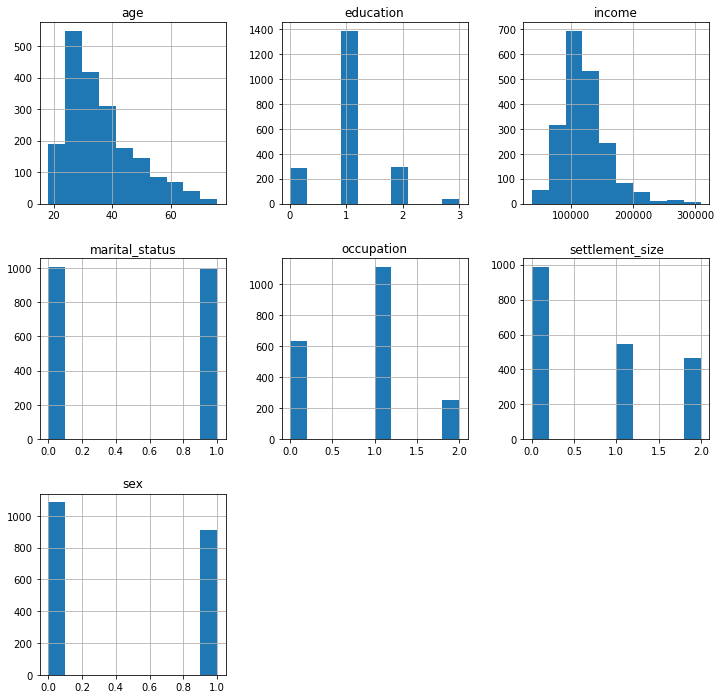

In [12]:
df.hist(figsize=(12, 12));

In [13]:
dfss = df.copy()

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()

In [16]:
dfss[dfss.columns] = ss.fit_transform(dfss)

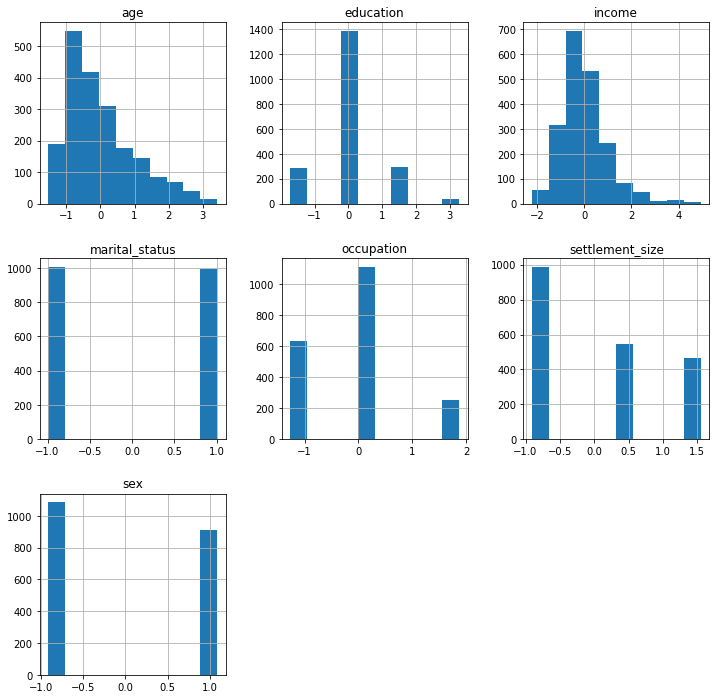

In [17]:
dfss.hist(figsize=(12, 12));

# Hierarchical Clustering

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [19]:
hier_clust = linkage(dfss, method='ward')

In [20]:
dfss.shape

(2000, 7)

In [21]:
hier_clust.shape

(1999, 4)

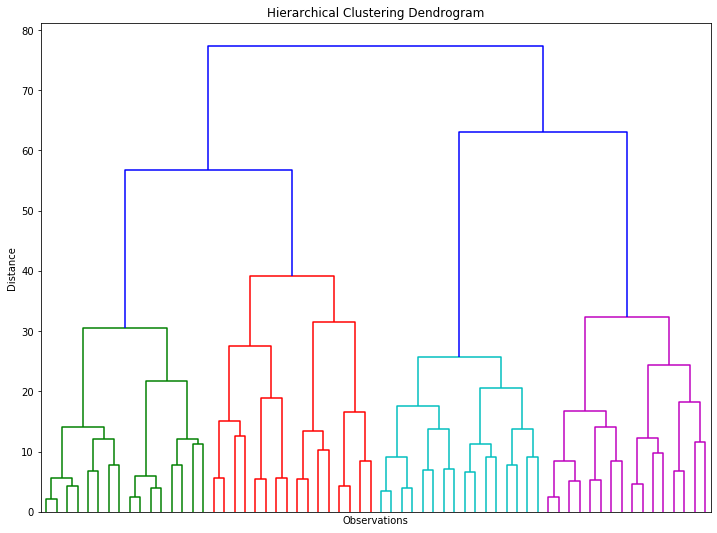

In [23]:
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust, 
           show_leaf_counts=False,
           truncate_mode='level',
           p=5,
           no_labels=True)
plt.show()

# K-Means Clustering

In [24]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

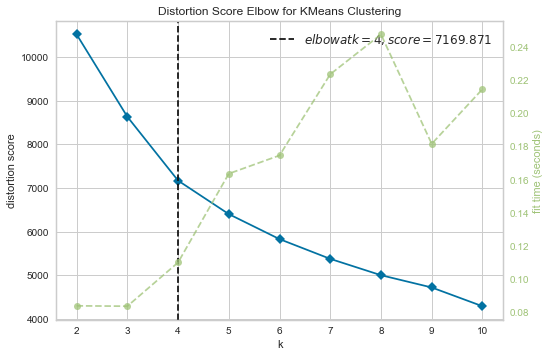

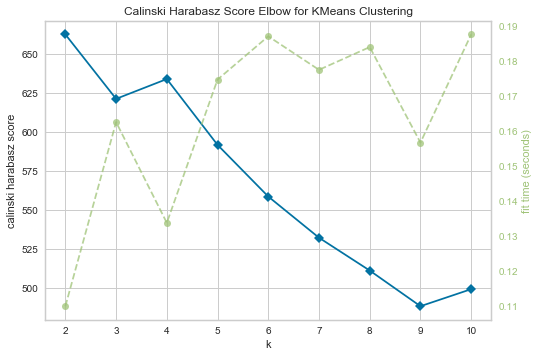

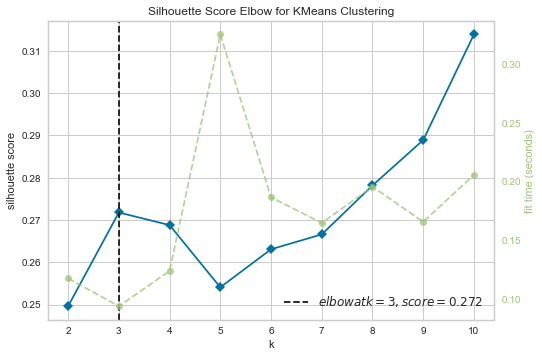

In [28]:
kmeans = KMeans(init='k-means++', random_state=42)
KElbowVisualizer(model=kmeans, k=10, metric='distortion').fit(dfss).show()
KElbowVisualizer(model=kmeans, k=10, metric='calinski_harabasz').fit(dfss).show()
KElbowVisualizer(model=kmeans, k=10, metric='silhouette').fit(dfss).show()

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans.fit(dfss)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [30]:
df['kmeans_labels'] = kmeans.labels_

In [65]:
px.scatter_matrix(df, color='kmeans_labels', width=1200, height=1200)

In [66]:
px.scatter(df, x='age', y='income', color='kmeans_labels')

In [68]:
px.parallel_coordinates(df, color='kmeans_labels', width=1000, height=800)

In [69]:
px.parallel_categories(df, color='kmeans_labels' , width=1000, height=800)